In [137]:

# Scikit-learn functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, Normalizer 

# Data
import numpy as np
import pandas as pd
import math
import datetime

# Visualise Data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as gfo



#initialising our dataframe
df = pd.read_csv("indexProcessed.csv")
df.head()

Index        Date         Open         High          Low        Close  \
0   HSI  1986-12-31  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  1987-01-02  2540.100098  2540.100098  2540.100098  2540.100098   
2   HSI  1987-01-05  2552.399902  2552.399902  2552.399902  2552.399902   
3   HSI  1987-01-06  2583.899902  2583.899902  2583.899902  2583.899902   
4   HSI  1987-01-07  2607.100098  2607.100098  2607.100098  2607.100098   

     Adj Close  Volume    CloseUSD  
0  2568.300049     0.0  333.879006  
1  2540.100098     0.0  330.213013  
2  2552.399902     0.0  331.811987  
3  2583.899902     0.0  335.906987  
4  2607.100098     0.0  338.923013

In [138]:
#as we only want to analysis 'NYA' we drop all othere stocks from the dataframe
df.drop(df.index[(df["Index"] != "NYA")],axis=0,inplace=True)
df.head()

Index        Date        Open        High         Low       Close  \
8492   NYA  1965-12-31  528.690002  528.690002  528.690002  528.690002   
8493   NYA  1966-01-03  527.210022  527.210022  527.210022  527.210022   
8494   NYA  1966-01-04  527.840027  527.840027  527.840027  527.840027   
8495   NYA  1966-01-05  531.119995  531.119995  531.119995  531.119995   
8496   NYA  1966-01-06  532.070007  532.070007  532.070007  532.070007   

       Adj Close  Volume    CloseUSD  
8492  528.690002     0.0  528.690002  
8493  527.210022     0.0  527.210022  
8494  527.840027     0.0  527.840027  
8495  531.119995     0.0  531.119995  
8496  532.070007     0.0  532.070007

In [139]:
figure = gfo.Figure(data=[gfo.Candlestick(x=df['Date'], 
                                           open=df['Open'], high=df['High'], 
                                           low=df['Low'], close=df['Close'])])

figure.update_layout(title="NYA Stock Price")
figure.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13947 entries, 8492 to 22438
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13947 non-null  object 
 1   Date       13947 non-null  int64  
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
 8   CloseUSD   13947 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.1+ MB
None


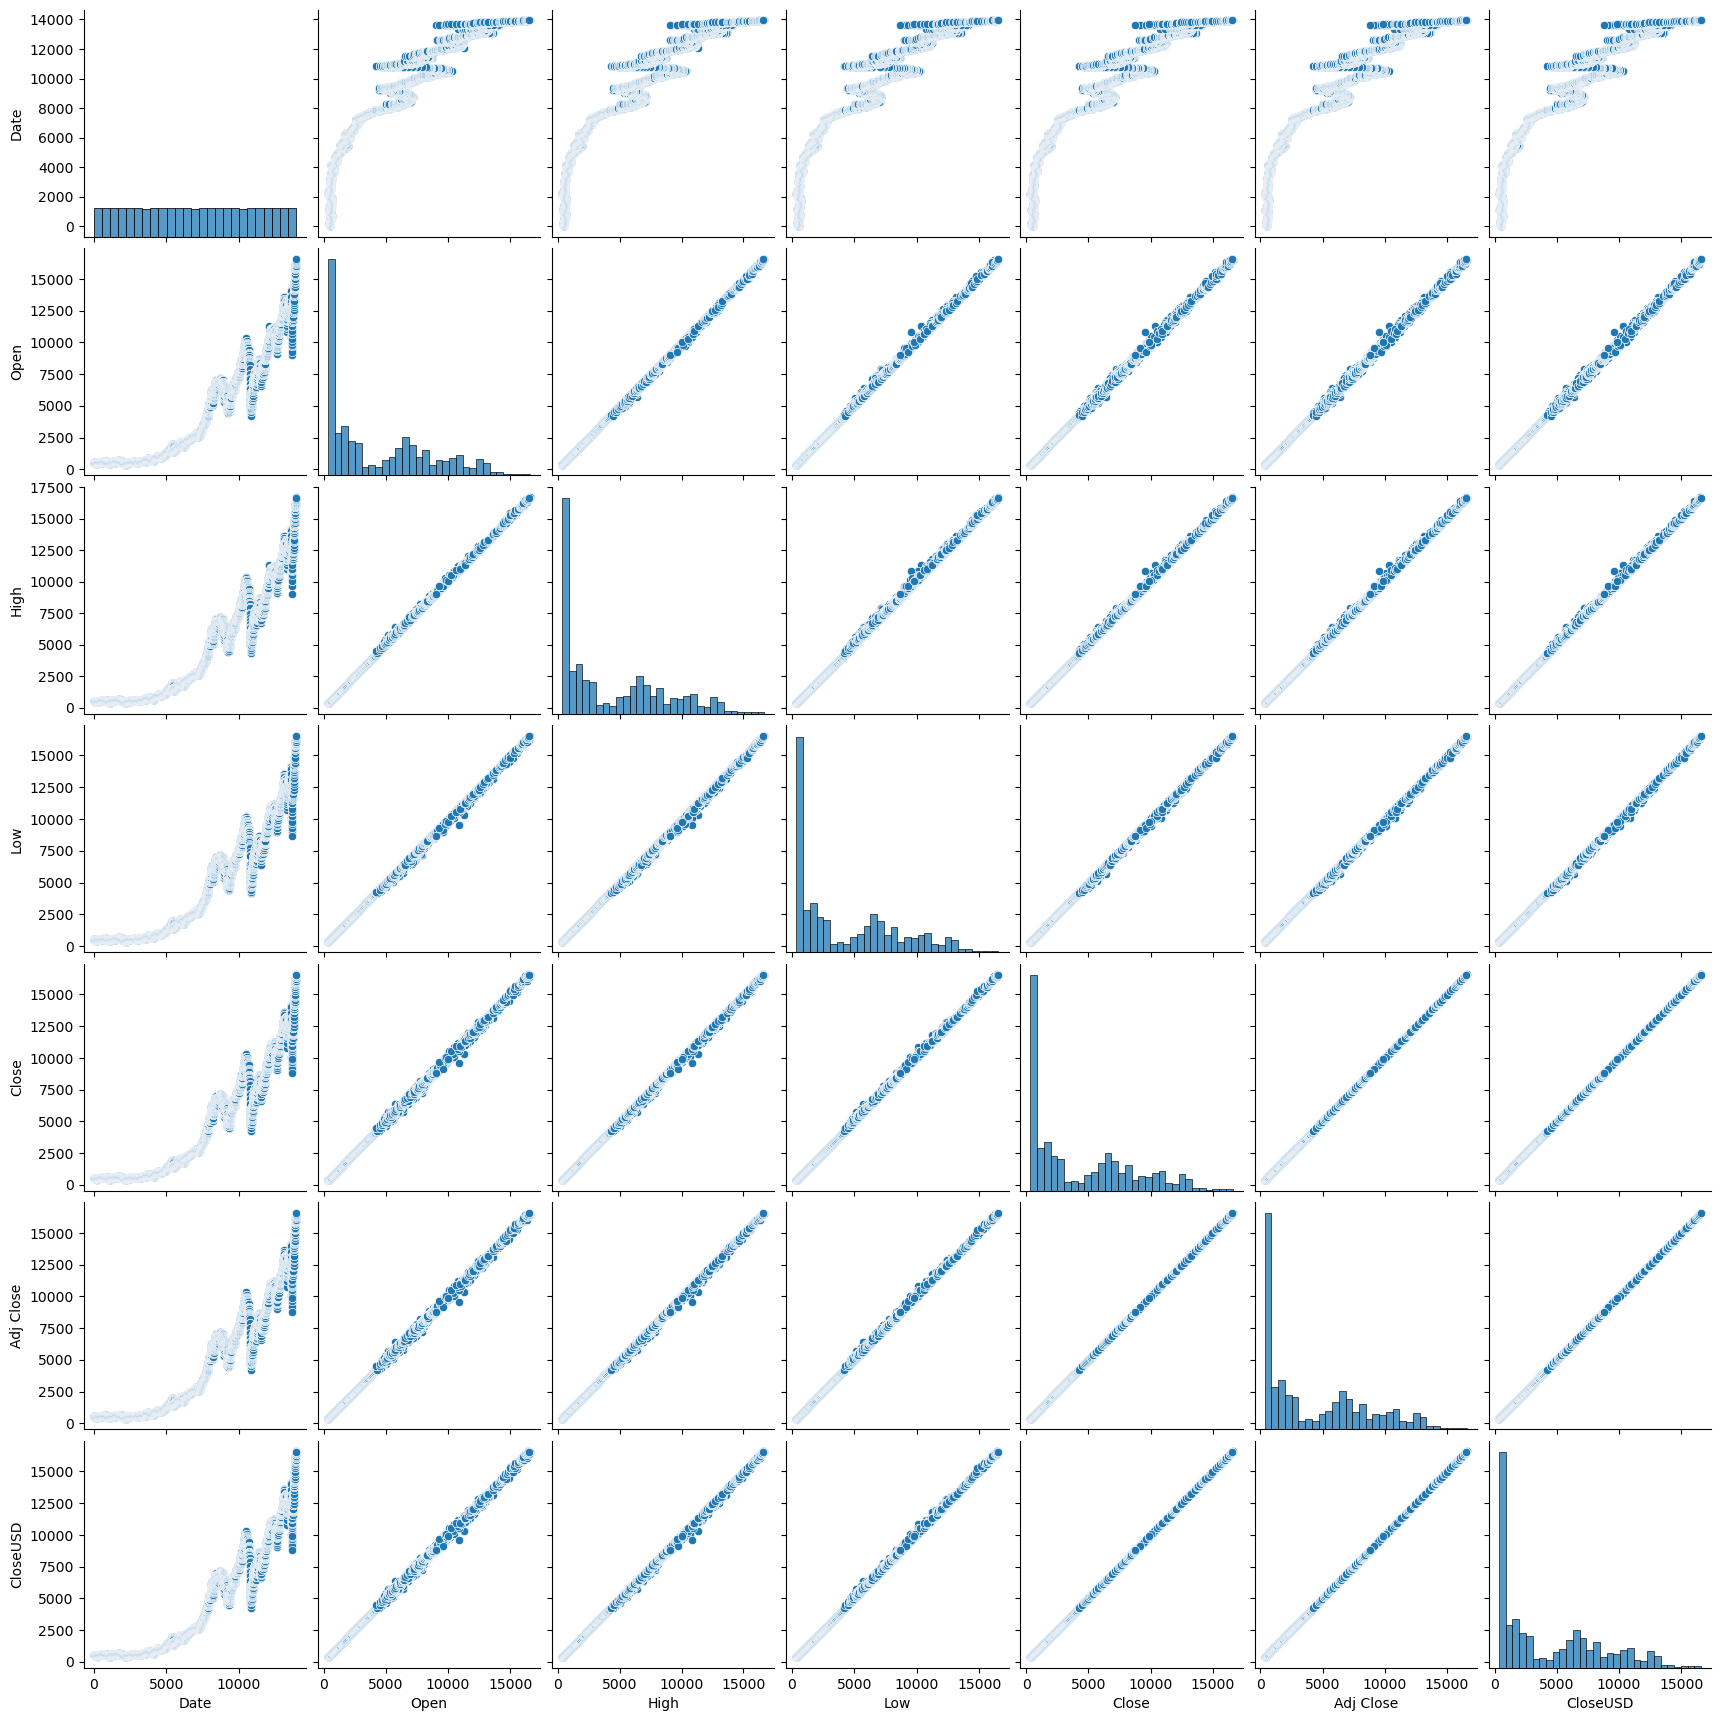

In [140]:
# converting Date to int
dates = df['Date']
new_dates = []
for x in range (len(dates)):
    new_dates.append(x+1)
df['Date'] = new_dates

#Reviewing Dataframe
print(df.info())
sns.pairplot(df, vars=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'CloseUSD'])
plt.show()

In [141]:
# checking correlation between variables
#(print(df.corr()))

#plt.figure(figsize=(16,8))

#sns.heatmap(df.corr(), cmap="Reds", annot=True)
#plt.show()

In [142]:
# dependent variable
y = df['Close']

# independent varaiables
x = df[['Date', 'Open', 'High', 'Low']]

In [143]:
# Split data for testing (25%) and training (75%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [144]:
#Standardised data
s_x_train = StandardScaler().fit_transform(x_train)
s_x_test = StandardScaler().fit_transform(x_test)

#Normailsing data
n_x_train = Normalizer().fit_transform(x_train)
n_x_test = Normalizer().fit_transform(x_test)

In [145]:

# Regression on untransformed data
lr = LinearRegression()
lr.fit(x_train, y_train)

rid = Ridge()
rid.fit(x_train, y_train)

# Regression on standardised data

lr_s = LinearRegression()
lr_s.fit(s_x_train, y_train)

rid_s = Ridge()
rid_s.fit(s_x_train, y_train)

# Regression on normalised data

lr_n = LinearRegression()
lr_n.fit(n_x_train, y_train)

rid_n= Ridge()
rid_n.fit(n_x_train, y_train)


# make predictions for all data types
lr_pred = lr.predict(x_test)
rid_pred = rid.predict(x_test)

lr_s_pred = lr_s.predict(s_x_test)
rid_s_pred = rid_s.predict(s_x_test)

lr_n_pred = lr_n.predict(n_x_test)
rid_n_pred = rid_n.predict(n_x_test)

In [146]:
# prediction tables of actual vs predicted values for linear regression using untransformed data
df_lr = pd.DataFrame(y_test, lr_pred)
df_lr_result = pd.DataFrame({'Acutal':y_test, 'Predicted':lr_pred})
print("\n" + "Linear Untransformed Data")
print(df_lr_result)
df_lr_result.describe()



Linear Untransformed Data
             Acutal     Predicted
17454   6451.350098   6451.249252
15479   2704.870117   2705.227027
13841   1714.949951   1715.189333
15934   3186.709961   3187.050943
11823    611.159973    611.227375
...             ...           ...
12733    845.369995    845.576833
22215  12075.580080  12039.335366
20800  11041.419920  11046.483267
21957  13152.549810  13131.740010
15148   2332.669922   2333.043509

[3487 rows x 2 columns]


Acutal     Predicted
count   3487.000000   3487.000000
mean    4449.721131   4450.032120
std     4050.722961   4050.932134
min      366.170013    366.046241
25%      660.910004    660.879725
50%     2677.800049   2678.169939
75%     7262.665039   7268.052336
max    16590.429690  16580.622202

In [147]:
# prediction tables of actual vs predicted values for linear regression using standardised data
df_lr_s = pd.DataFrame(y_test, lr_s_pred)
df_lr_s_result = pd.DataFrame({'Acutal':y_test, 'Predicted':lr_s_pred})
print("\n" + "Linear Standardized Data")
print(df_lr_s_result)
df_lr_s_result.describe()


Linear Standardized Data
             Acutal     Predicted
17454   6451.350098   6470.645838
15479   2704.870117   2693.854235
13841   1714.949951   1695.684145
15934   3186.709961   3179.635857
11823    611.159973    582.653931
...             ...           ...
12733    845.369995    818.928550
22215  12075.580080  12104.649646
20800  11041.419920  11103.627602
21957  13152.549810  13206.012763
15148   2332.669922   2318.613605

[3487 rows x 2 columns]


Acutal     Predicted
count   3487.000000   3487.000000
mean    4449.721131   4452.992649
std     4050.722961   4084.209024
min      366.170013    335.458588
25%      660.910004    632.713986
50%     2677.800049   2666.574918
75%     7262.665039   7294.160577
max    16590.429690  16683.226892

In [148]:
# prediction tables of actual vs predicted values for linear regression using normalised data
df_lr_s = pd.DataFrame(y_test, lr_s_pred)
df_lr_s_result = pd.DataFrame({'Acutal':y_test, 'Predicted':lr_s_pred})
print("\n" + "Linear Standardized Data")
print(df_lr_s_result)
df_lr_s_result.describe()


Linear Standardized Data
             Acutal     Predicted
17454   6451.350098   6470.645838
15479   2704.870117   2693.854235
13841   1714.949951   1695.684145
15934   3186.709961   3179.635857
11823    611.159973    582.653931
...             ...           ...
12733    845.369995    818.928550
22215  12075.580080  12104.649646
20800  11041.419920  11103.627602
21957  13152.549810  13206.012763
15148   2332.669922   2318.613605

[3487 rows x 2 columns]


Acutal     Predicted
count   3487.000000   3487.000000
mean    4449.721131   4452.992649
std     4050.722961   4084.209024
min      366.170013    335.458588
25%      660.910004    632.713986
50%     2677.800049   2666.574918
75%     7262.665039   7294.160577
max    16590.429690  16683.226892

In [149]:
# prediction tables of actual vs predicted values for Ridge regression using untransformed data
df_rid = pd.DataFrame(y_test, rid_pred)
df_rid_result = pd.DataFrame({'Acutal':y_test, 'Predicted':rid_pred})
print("\n" + "Ridge Untransformed Data")
print(df_rid_result)
df_rid_result.describe()


Ridge Untransformed Data
             Acutal     Predicted
17454   6451.350098   6451.249253
15479   2704.870117   2705.227027
13841   1714.949951   1715.189334
15934   3186.709961   3187.050943
11823    611.159973    611.227375
...             ...           ...
12733    845.369995    845.576833
22215  12075.580080  12039.335355
20800  11041.419920  11046.483268
21957  13152.549810  13131.740011
15148   2332.669922   2333.043509

[3487 rows x 2 columns]


Acutal     Predicted
count   3487.000000   3487.000000
mean    4449.721131   4450.032121
std     4050.722961   4050.932134
min      366.170013    366.046241
25%      660.910004    660.879725
50%     2677.800049   2678.169939
75%     7262.665039   7268.052338
max    16590.429690  16580.622199

In [150]:
# prediction tables of actual vs predicted values for Ridge regression using standardised data
df_rid_s = pd.DataFrame(y_test, rid_s_pred)
df_rid_s_result = pd.DataFrame({'Acutal':y_test, 'Predicted':rid_s_pred})
print("\n" + "Ridge Standardized Data")
print(df_rid_s_result)
df_rid_s_result.describe()


Ridge Standardized Data
             Acutal     Predicted
17454   6451.350098   6473.813922
15479   2704.870117   2695.420008
13841   1714.949951   1696.295453
15934   3186.709961   3181.503342
11823    611.159973    582.109823
...             ...           ...
12733    845.369995    818.858862
22215  12075.580080  12056.300186
20800  11041.419920  11103.704252
21957  13152.549810  13207.967581
15148   2332.669922   2319.956057

[3487 rows x 2 columns]


Acutal     Predicted
count   3487.000000   3487.000000
mean    4449.721131   4452.992649
std     4050.722961   4083.972461
min      366.170013    334.317296
25%      660.910004    632.161360
50%     2677.800049   2668.150654
75%     7262.665039   7294.146010
max    16590.429690  16665.624163

In [151]:
# prediction tables of actual vs predicted values for Ridge regression using normalised data
df_rid_n = pd.DataFrame(y_test, rid_n_pred)
df_rid_n_result = pd.DataFrame({'Acutal':y_test, 'Predicted':rid_n_pred})
print("\n" + "Ridge Normalised Data")
print(df_rid_n_result)
df_rid_n_result.describe()


Ridge Normalised Data
             Acutal    Predicted
17454   6451.350098  6892.155760
15479   2704.870117  3910.535383
13841   1714.949951  2698.575455
15934   3186.709961  4525.744953
11823    611.159973  -785.570823
...             ...          ...
12733    845.369995  -309.645274
22215  12075.580080  7448.950396
20800  11041.419920  7397.799775
21957  13152.549810  7500.648186
15148   2332.669922  3277.623627

[3487 rows x 2 columns]


Acutal    Predicted
count   3487.000000  3487.000000
mean    4449.721131  4454.271952
std     4050.722961  2960.426907
min      366.170013 -1845.879639
25%      660.910004  1962.854636
50%     2677.800049  5572.035868
75%     7262.665039  7123.751555
max    16590.429690  8190.750399

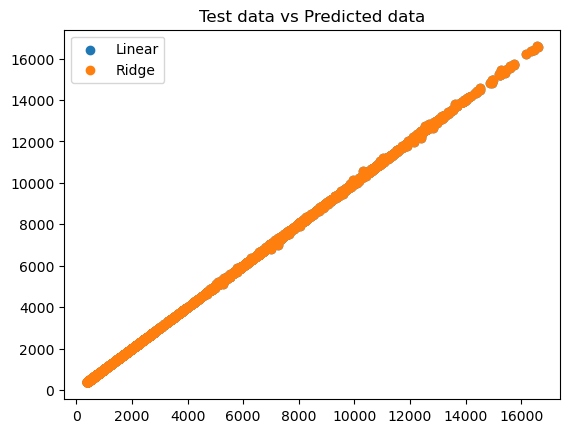

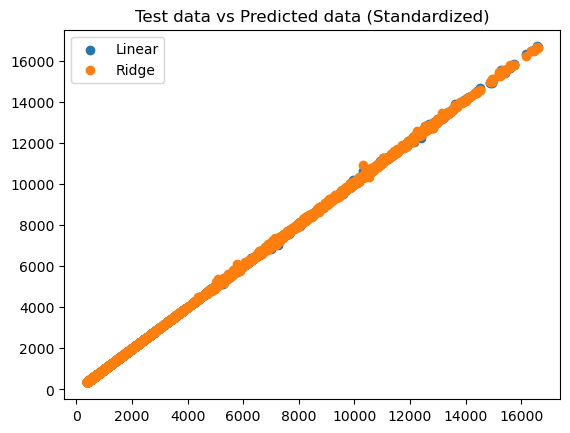

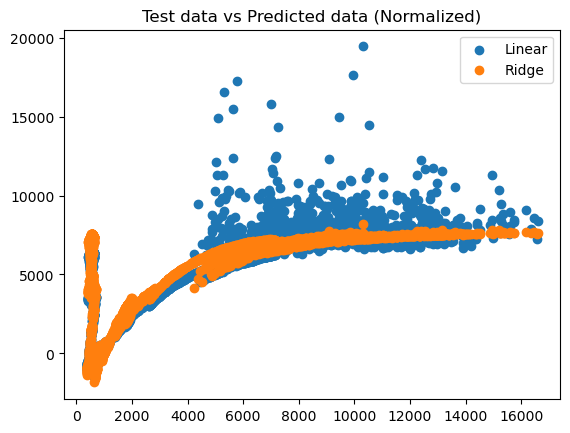

In [152]:
# Plotting the expected Y values vs predicted y values for untransformed data
plt.scatter(y_test, lr_pred, label="Linear") 
plt.scatter(y_test, rid_pred, label="Ridge")
plt.title("Test data vs Predicted data")
plt.legend()
plt.show()


# Plotting the expected Y values vs predicted y values for Standardized data
plt.scatter(y_test, lr_s_pred, label="Linear") 
plt.scatter(y_test, rid_s_pred, label="Ridge")
plt.title("Test data vs Predicted data (Standardized)")
plt.legend()
plt.show()

# Plotting the expected Y values vs predicted y values for Normalized data
plt.scatter(y_test, lr_n_pred, label="Linear") 
plt.scatter(y_test, rid_n_pred, label="Ridge")
plt.title("Test data vs Predicted data (Normalized)")
plt.legend()
plt.show()

In [153]:
# Regression Score for different data types
# close to 1 (100%) is better

lr_score = lr.score(x_test, y_test)
lr_s_score = lr_s.score(s_x_test, y_test)
lr_n_score = lr_n.score(n_x_test, y_test)

rid_score = rid.score(x_test, y_test)
rid_s_score = rid_s.score(s_x_test, y_test)
rid_n_score = rid_n.score(n_x_test, y_test)

print ("Linear Regression Score (Untransformed): ", lr_score)
print ("Linear Regression Score (Standardized): ", lr_s_score) 
print ("Linear Regression Score (Normalized): ", lr_n_score) 
print ("\n")
print ("Ridge Regression Score (Untransformed): ", rid_score)
print ("Ridge Regression Score (Standardized): ", rid_s_score) 
print ("Ridge Regression Score (Normalized): ", rid_n_score) 



Linear Regression Score (Untransformed):  0.9999739473274065
Linear Regression Score (Standardized):  0.9999047504623888
Linear Regression Score (Normalized):  0.6203640159221223


Ridge Regression Score (Untransformed):  0.9999739473276922
Ridge Regression Score (Standardized):  0.9998783995921834
Ridge Regression Score (Normalized):  0.5535673932303544


In [154]:
# Evaluation - better results mean these metrics are closer to 0.
print ("\n" + "Linear Regression (Untransformed)")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, lr_pred))
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test, lr_pred))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_absolute_error(y_test, lr_pred)))

print ("\n" + "Linear Regression (Standardised)")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, lr_s_pred))
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test, lr_s_pred))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_absolute_error(y_test, lr_s_pred)))

print ("\n" + "Linear Regression (Normalized)")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, lr_n_pred))
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test, lr_n_pred))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_absolute_error(y_test, lr_n_pred)))

print ("\n" + "Ridge Regression (Untransformed)")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, rid_pred))
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test, rid_pred))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_absolute_error(y_test, rid_pred)))

print ("\n" + "Ridge Regression (Standardized)")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, rid_s_pred))
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test, rid_s_pred))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_absolute_error(y_test, rid_s_pred)))

print ("\n" + "Ridge Regression (Normalized)")
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, rid_n_pred))
print("Mean Squared Error: ", metrics.mean_absolute_error(y_test, rid_n_pred))
print("Root Mean Squared Error: ", math.sqrt(metrics.mean_absolute_error(y_test, rid_n_pred)))


Linear Regression (Untransformed)
Mean Absolute Error:  7.958770811476296
Mean Squared Error:  7.958770811476296
Root Mean Squared Error:  2.8211293503624213

Linear Regression (Standardised)
Mean Absolute Error:  30.857156869230003
Mean Squared Error:  30.857156869230003
Root Mean Squared Error:  5.554921859867158

Linear Regression (Normalized)
Mean Absolute Error:  1706.5657079775854
Mean Squared Error:  1706.5657079775854
Root Mean Squared Error:  41.31060043109499

Ridge Regression (Untransformed)
Mean Absolute Error:  7.9587711366144855
Mean Squared Error:  7.9587711366144855
Root Mean Squared Error:  2.8211294079879576

Ridge Regression (Standardized)
Mean Absolute Error:  32.60930223944537
Mean Squared Error:  32.60930223944537
Root Mean Squared Error:  5.710455519434975

Ridge Regression (Normalized)
Mean Absolute Error:  1924.9901061505238
Mean Squared Error:  1924.9901061505238
Root Mean Squared Error:  43.874709185936766
